# Proximity Experiments

## Imports

In [57]:
import os
import glob
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

In [58]:
paths = glob.glob('data/proximity/dataset_*.csv')
paths

['data/proximity\\dataset_238a.csv',
 'data/proximity\\dataset_ips.csv',
 'data/proximity\\dataset_test_home.csv',
 'data/proximity\\dataset_test_home_asus.csv',
 'data/proximity\\dataset_test_home_big.csv',
 'data/proximity\\dataset_test_university.csv',
 'data/proximity\\dataset_train_university.csv']

In [59]:
dataset = pd.DataFrame()
for path in paths:
    data = pd.read_csv(path)
    data['filename'] = os.path.split(path)[1]
    dataset = dataset.append(data)    

dataset
#dataset[dataset['filename'] == 'dataset_238a.csv']

,coordinate_X,coordinate_Y,rssi_Value,rolling_mean_rssi,zone,filename
0,0.0,0.0,-25,-25.000000,Personal,dataset_238a.csv
1,0.0,0.0,-27,-26.000000,Personal,dataset_238a.csv
2,0.0,0.0,-28,-26.666667,Personal,dataset_238a.csv
3,0.0,0.0,-28,-27.000000,Personal,dataset_238a.csv
4,0.0,0.0,-28,-27.200000,Personal,dataset_238a.csv
...,...,...,...,...,...,...
24829,0.0,4.5,-92,-90.480000,Public,dataset_train_university.csv
24830,0.0,4.5,-93,-90.576923,Public,dataset_train_university.csv
24831,0.0,4.5,-90,-90.555556,Public,dataset_train_university.csv
24832,0.0,4.5,-90,-90.535714,Public,dataset_train_university.csv


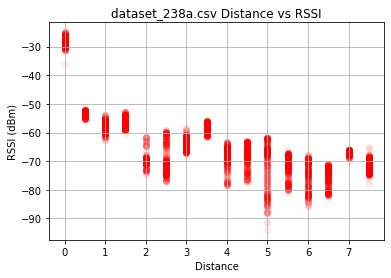

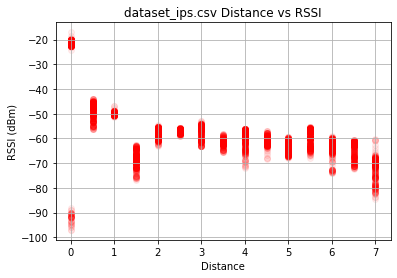

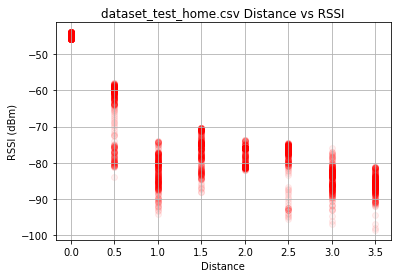

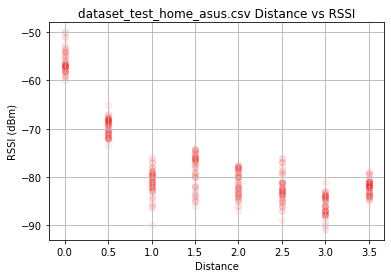

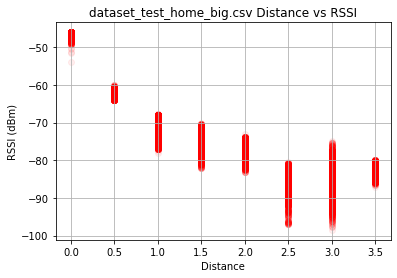

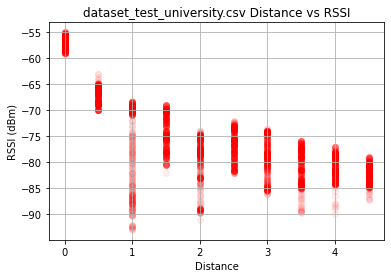

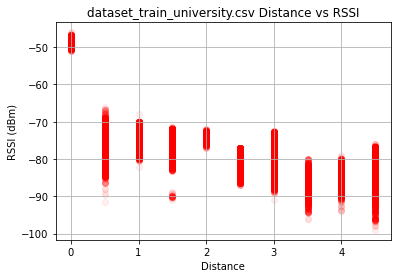

In [62]:
for path in paths:
    filename = os.path.split(path)[1]
    data = dataset[dataset['filename'] == filename]
    fig, ax = plt.subplots()
    #ax.scatter(data['coordinate_Y'], data['rssi_Value'], c='#00ff0010')
    ax.scatter(data['coordinate_Y'], data['rolling_mean_rssi'], c="#ff000010" )

    ax.set(xlabel='Distance', ylabel='RSSI (dBm)',
           title=filename+' Distance vs RSSI')
    ax.grid()
    plt.show()